<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 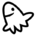 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install deepdriver==0.0.51

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 28.1 MB/s 
     |████████████████████████████████| 46 kB 5.8 MB/s 
     |████████████████████████████████| 409 kB 71.6 MB/s 
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42917 sha256=8ee6c629f0e0c8daaee44d07eef75f8400a5a1f6ff37e7bcd84cf3bbfb823118
  Stored in directory: /root/.cache/pip/wheels/57/86/c9/1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.11 which is incompatible.
te

#1. ➕ import deepdriver & deeplearnig framework



In [6]:
import tensorflow as tf

In [7]:
import deepdriver

#2. prepare dataset

In [56]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-12-14 06:37:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 173.194.69.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  29.6MB/s    in 2.2s    

2022-12-14 06:37:08 (29.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [61]:
import os
import zipfile

train_dir = '/content/cat_dog6/'
os.mkdir(train_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [62]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [63]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =700
test_data_count = 100
valid_data_count =200
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [64]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [65]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 700
Total training dog images : 700
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 200
Total test dog images : 200


#2. ⚙ deepdriver server setting

In [66]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [67]:
deepdriver.login(key="MGY2ZWY5NjY0NjE3YjVkODBhNGRkYjBkZDAzYzQ5MGMxMzVhZWRhNzkyYTdiNDI4ZGZmYjZmZDhmYzdkY2I3ZQ==")

True

#4. 🥼 create experiment and run

In [68]:
# experiment init & config hyperparam
deepdriver.init(exp_name= "exper4_cat_dog_cnn", 
                config={ 'architecture':"CNN", 'epoch': 30, 'batch_size': 32, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-14 06:37:49,354 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exper4_cat_dog_cnn
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exper4_cat_dog_cnn/run-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exper4_cat_dog_cnn
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exper4_cat_dog_cnn/run-1/run/chart


#6. 📚 train your code and send log

In [69]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(deepdriver.config.hidden_layer, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [70]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=deepdriver.config.learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                  batch_size=deepdriver.config.batch_size,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [72]:
class CustomCallback(tf.keras.callbacks.Callback):

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)


In [73]:
steps_per_epoch = train_generator.n//deepdriver.config.batch_size

In [74]:
validation_steps = validation_generator.n//deepdriver.config.batch_size

In [75]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()]),
                    verbose=2)

Epoch 1/30
43/43 [==============================] - 7s 140ms/step - loss: 1.0168 - accuracy: 0.5307 - val_loss: 0.6825 - val_accuracy: 0.5104
Epoch 2/30
43/43 [==============================] - 5s 114ms/step - loss: 0.6910 - accuracy: 0.5731 - val_loss: 0.6571 - val_accuracy: 0.6250
Epoch 3/30
43/43 [==============================] - 5s 115ms/step - loss: 0.6494 - accuracy: 0.6608 - val_loss: 0.6242 - val_accuracy: 0.6302
Epoch 4/30
43/43 [==============================] - 5s 113ms/step - loss: 0.5350 - accuracy: 0.7273 - val_loss: 0.6334 - val_accuracy: 0.6354
Epoch 5/30
43/43 [==============================] - 5s 113ms/step - loss: 0.4924 - accuracy: 0.7785 - val_loss: 0.7171 - val_accuracy: 0.6510
Epoch 6/30
43/43 [==============================] - 5s 112ms/step - loss: 0.4059 - accuracy: 0.8260 - val_loss: 0.7460 - val_accuracy: 0.6667
Epoch 7/30
43/43 [==============================] - 5s 112ms/step - loss: 0.3031 - accuracy: 0.8830 - val_loss: 0.7493 - val_accuracy: 0.6771
Epoch 

In [77]:
model.save("cat_dog_cnn_model")

#6. ⬆ upload artifact(Model)

In [76]:
arti = deepdriver.Artifacts(name="cat_dog_cnn_model",type="model")

In [78]:
arti.add("cat_dog_cnn_model")

In [79]:
[ent.path for ent  in arti.entry_list]

['saved_model.pb',
 'variables/variables.index',
 'variables/variables.data-00000-of-00001',
 'keras_metadata.pb']

In [80]:
arti.upload()

Uploading: [./cat_dog_cnn_model/keras_metadata.pb] |██████████████████████████████| [100.0%] [4/4]

True

#7. ⬇ download artifact(Model)

In [81]:
arti2 = deepdriver.get_artifact(name="cat_dog_cnn_model",type="model")

2022-12-14 07:02:02,112 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{14}


INFO:deepdriver:artifact is got! 
 artifact id :{14}


In [82]:
arti2.download()

Downloading: [./deepdriver/artifact/14/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

'./deepdriver/artifact/14'

In [83]:
reload_model = tf.keras.models.load_model("./deepdriver/artifact/14")

In [103]:
history = reload_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/30
43/43 - 5s - loss: 0.4772 - accuracy: 0.9759 - val_loss: 2.8111 - val_accuracy: 0.6354 - 5s/epoch - 128ms/step
Epoch 2/30
43/43 - 6s - loss: 9.4367e-05 - accuracy: 1.0000 - val_loss: 2.8575 - val_accuracy: 0.6719 - 6s/epoch - 146ms/step
Epoch 3/30
43/43 - 5s - loss: 1.4274e-05 - accuracy: 1.0000 - val_loss: 3.1285 - val_accuracy: 0.6823 - 5s/epoch - 115ms/step
Epoch 4/30
43/43 - 5s - loss: 3.2196e-06 - accuracy: 1.0000 - val_loss: 3.7330 - val_accuracy: 0.6823 - 5s/epoch - 109ms/step
Epoch 5/30
43/43 - 5s - loss: 0.0961 - accuracy: 0.9905 - val_loss: 12.1200 - val_accuracy: 0.4948 - 5s/epoch - 109ms/step
Epoch 6/30
43/43 - 5s - loss: 0.1976 - accuracy: 0.9861 - val_loss: 2.5746 - val_accuracy: 0.6562 - 5s/epoch - 111ms/step
Epoch 7/30
43/43 - 5s - loss: 8.9523e-05 - accuracy: 1.0000 - val_loss: 2.9771 - val_accuracy: 0.6510 - 5s/epoch - 110ms/step
Epoch 8/30
43/43 - 5s - loss: 1.0334e-05 - accuracy: 1.0000 - val_loss: 3.0980 - val_accuracy: 0.6615 - 5s/epoch - 108ms/step
Epo

In [104]:
reload_model.save("cat_dog_cnn_model2")

In [105]:
arti = deepdriver.Artifacts(name="cat_dog_cnn_model2",type="model")

In [107]:
arti.add("cat_dog_cnn_model2")

In [ ]:
arti.upload()

Uploading: [./cat_dog_cnn_model2/keras_metadata.pb] |██████████████████████████████| [100.0%] [4/4]

#10. 🔚 finish run

In [27]:
# finish experiment
deepdriver.finish()

True